Results1.4


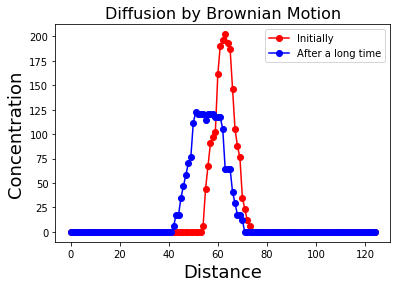

In [142]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize                        # import a specific function from a package: 'optimize' for curve fitting

file_name = 'Results1.4'                           # replace with the name of your csv data file

file_folder = ''                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name
print(data_file)


xdata, ydata = np.loadtxt(                 
        data_file,                                # file to read
        delimiter = '\t',                         # specify delimiting character 
#       delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 11),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.                                                                                                   

xdata2, ydata2 = np.loadtxt(                 
        data_file,                                # file to read
        delimiter = '\t',                         # specify delimiting character 
#      delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 55),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows. 


xdata3, ydata3 = np.loadtxt(                 
        data_file,                                # file to read
        delimiter = '\t',                         # specify delimiting character 
#       delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 300),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows. 

xdata4, ydata4 = np.loadtxt(                 
        data_file,                                # file to read
        delimiter = '\t',                         # specify delimiting character 
#       delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 170),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows. 

plt.clf()                                         # clear plot figure
# plt.plot(xdata, ydata, '-om', label = 'fit')                     # plot the fit function 
plt.plot(xdata2, ydata2, '-or', label = 'Initially')                     # plot the fit function 
# plt.plot(xdata, ydata3, '-og', label = 'fit')                     # plot the fit function 
plt.plot(xdata4, ydata4, '-ob', label = 'After a long time')                     # plot the fit function 
# plt.plot(x2, y2, '-r', label = 'non-leaky')
# plt.errorbar(xdata, ydata, fmt='k.')        # plot data with error bars, define format of plot (k=black)
plt.title('Diffusion by Brownian Motion',fontsize = 16)             # plot title
plt.xlabel('Distance',fontsize = 18)                     # label x axis
plt.ylabel('Concentration',fontsize = 18)                     # label y axis
#plt.xlim(np.min(xdata),np.max(xdata))             # choose limits of x or y axis 
#plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis                                          
plt.savefig("./"+file_name+'DataWithFit_initial.png',dpi=300)         # save figure of plot
plt.legend() 
plt.show()                                        # show plot



Results3.csv
a: 270.1560387427928 +- 4.561942602771158
x0: 65.66356398381295 +- 0.06581655345315161
sigma: 3.375536362182665 +- 0.06581655424693057

a_2: 89.13316685319393 +- 2.44394281239289
x0_2: 61.81159447211868 +- 0.3859288448551376
sigma_2: 12.189104861768314 +- 0.38592884627945245


<Figure size 432x288 with 0 Axes>

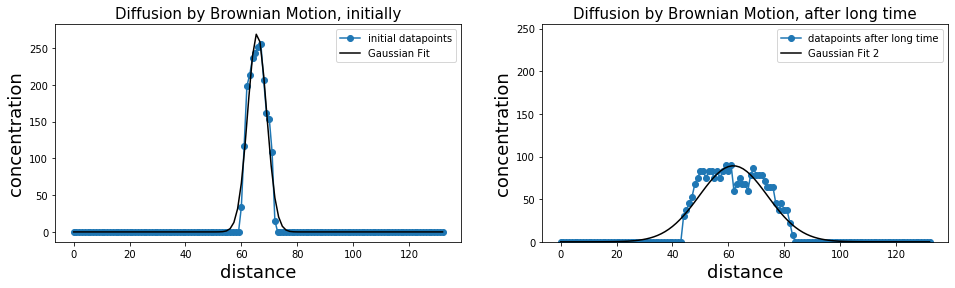

In [138]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize, signal                        # import a specific function from a package: 'optimize' for curve fitting

file_name = 'Results3.csv'                           # replace with the name of your csv data file

file_folder = ''                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name
print(data_file)


xdata, ydata = np.loadtxt(                 
        data_file,                                # file to read
#       delimiter = '\t',                         # specify delimiting character 
        delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 11),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.                                                                                                   

xdata2, ydata2 = np.loadtxt(                 
        data_file,                                # file to read
#       delimiter = '\t',                         # specify delimiting character 
        delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 550),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows. 

xdata3, ydata3 = np.loadtxt(                 
        data_file,                                # file to read
#       delimiter = '\t',                         # specify delimiting character 
        delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 300),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.


# def func(x,a,b):                                # Define your fitting function
#     ans = a*np.exp(-0.5*((x-67)**2)/(b**2))
#     return ans                   
 
#Gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

initialguess = [1,60,10]                     # initial guess for the parameters of the function func

fit, covariance = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        gauss_function,                                     # function to fit
        xdata,                                    # data for independant variable
        ydata,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameters
#         yerr)                                     # uncertainty in dependant variable

print("a:",fit[0],"+-",np.sqrt(covariance[0][0]))     #print value and one std error of the first fit parameter
print("x0:",fit[1],"+-",np.sqrt(covariance[1][1]))     #print value and one std error of the second fit parameter
print("sigma:",fit[2],"+-",np.sqrt(covariance[2][2]))
# print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=gauss_function(xdatafit,*fit)                     # create discrete data set from fitting function

############ plot 2 ##################

fit2, covariance2 = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        gauss_function,                                     # function to fit
        xdata3,                                    # data for independant variable
        ydata3,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameters
#         yerr)                                     # uncertainty in dependant variable

print("\na_2:",fit2[0],"+-",np.sqrt(covariance2[0][0]))     #print value and one std error of the first fit parameter
print("x0_2:",fit2[1],"+-",np.sqrt(covariance2[1][1]))     #print value and one std error of the second fit parameter
print("sigma_2:",fit2[2],"+-",np.sqrt(covariance2[2][2]))
# print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

xdatafit2=np.linspace(min(xdata3), max(xdata3), 100) # make lots of xdata for a smooth curve
func_plot2=gauss_function(xdatafit2,*fit2)                     # create discrete data set from fitting function

##########
# Plotting data and fit
##########

plt.clf()                                         # clear plot figure

figure, (plot1, plot2) = plt.subplots(1,2, figsize = (16,4))    

# plt.plot(xdata, ydata, '-om', label = 'fit')                     # plot the fit function 
plot1.plot(xdata, ydata, '-o', label = 'initial datapoints')                     # plot the fit function 
plot1.plot(xdatafit, func_plot, '-k', label = 'Gaussian Fit')                     # plot the fit function 
plot1.legend() 

plot1.set_title('Diffusion by Brownian Motion, initially',fontsize = 15)             # plot title
plot1.set_xlabel('distance',fontsize = 18)                     # label x axis
plot1.set_ylabel('concentration',fontsize = 18)                     # label y axis
#plt.xlim(np.min(xdata),np.max(xdata))             # choose limits of x or y axis 
#plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis                                          
# plt.savefig("./"+file_name+'DataPlot_withFit_before.png',dpi=300)         # save figure of plot

# plt.plot(xdata, ydata3, '-og', label = 'fit')                     # plot the fit function 
# plt.plot(xdata2, ydata2, '-og', label = 'fit2')                     # plot the fit function 
plot2.plot(xdata3, ydata3, '-o', label = 'datapoints after long time')                     # plot the fit function 
plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis    

# plt.errorbar(xdata, ydata, fmt='k.')        # plot data with error bars, define format of plot (k=black)



plot2.plot(xdatafit2, func_plot2, '-k', label = 'Gaussian Fit 2')                     # plot the fit function 
plot2.legend() 

plot2.set_title('Diffusion by Brownian Motion, after long time',fontsize = 15)             # plot title
plot2.set_xlabel('distance',fontsize = 18)                     # label x axis
plot2.set_ylabel('concentration',fontsize = 18)                     # label y axis
#plt.xlim(np.min(xdata),np.max(xdata))             # choose limits of x or y axis 
#plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis                                          
# plt.savefig("./"+file_name+'DataPlot_withFit_300(2).png',dpi=300)         # save figure of plot

plt.show()                                        # show plot


Results3.csv
a: 270.1560387427928 +- 4.561942602771158
x0: 65.66356398381295 +- 0.06581655345315161
sigma: 3.375536362182665 +- 0.06581655424693057

a_2: 259.5768597421757 +- 2.8290230601921618
x0_2: 61.73059686099918 +- 0.04275372527753824
sigma_2: 3.397280668154621 +- 0.0427537257462004


<Figure size 432x288 with 0 Axes>

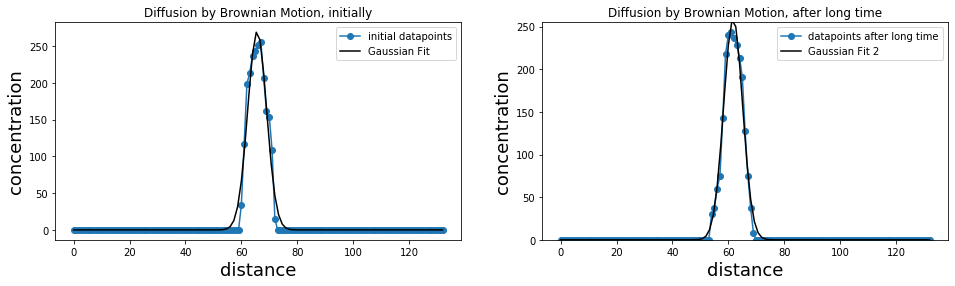

In [109]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize, signal                        # import a specific function from a package: 'optimize' for curve fitting

file_name = 'Results3.csv'                           # replace with the name of your csv data file

file_folder = ''                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name
print(data_file)


xdata, ydata = np.loadtxt(                 
        data_file,                                # file to read
#       delimiter = '\t',                         # specify delimiting character 
        delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 11),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.                                                                                                   

xdata3, ydata3 = np.loadtxt(                 
        data_file,                                # file to read
#       delimiter = '\t',                         # specify delimiting character 
        delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 45),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.


# def func(x,a,b):                                # Define your fitting function
#     ans = a*np.exp(-0.5*((x-67)**2)/(b**2))
#     return ans                   
 
#Gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

initialguess = [1,60,10]                     # initial guess for the parameters of the function func

fit, covariance = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        gauss_function,                                     # function to fit
        xdata,                                    # data for independant variable
        ydata,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameters
#         yerr)                                     # uncertainty in dependant variable

print("a:",fit[0],"+-",np.sqrt(covariance[0][0]))     #print value and one std error of the first fit parameter
print("x0:",fit[1],"+-",np.sqrt(covariance[1][1]))     #print value and one std error of the second fit parameter
print("sigma:",fit[2],"+-",np.sqrt(covariance[2][2]))
# print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=gauss_function(xdatafit,*fit)                     # create discrete data set from fitting function

############ plot 2 ##################

fit2, covariance2 = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        gauss_function,                                     # function to fit
        xdata3,                                    # data for independant variable
        ydata3,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameters
#         yerr)                                     # uncertainty in dependant variable

print("\na_2:",fit2[0],"+-",np.sqrt(covariance2[0][0]))     #print value and one std error of the first fit parameter
print("x0_2:",fit2[1],"+-",np.sqrt(covariance2[1][1]))     #print value and one std error of the second fit parameter
print("sigma_2:",fit2[2],"+-",np.sqrt(covariance2[2][2]))
# print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

xdatafit2=np.linspace(min(xdata3), max(xdata3), 100) # make lots of xdata for a smooth curve
func_plot2=gauss_function(xdatafit2,*fit2)                     # create discrete data set from fitting function

##########
# Plotting data and fit
##########

plt.clf()                                         # clear plot figure

figure, (plot1, plot2) = plt.subplots(1,2, figsize = (16,4))    

plot1.plot(xdata, ydata, '-o', label = 'initial datapoints')                     # plot the fit function 
plot1.plot(xdatafit, func_plot, '-k', label = 'Gaussian Fit')                     # plot the fit function 
plot1.legend() 
plot1.set_title('Diffusion by Brownian Motion, initially')             # plot title
plot1.set_xlabel('distance',fontsize = 18)                     # label x axis
plot1.set_ylabel('concentration',fontsize = 18)                     # label y axis

plot2.plot(xdata3, ydata3, '-o', label = 'datapoints after long time')                     # plot the fit function 
plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis    
plot2.plot(xdatafit2, func_plot2, '-k', label = 'Gaussian Fit 2')                     # plot the fit function 
plot2.legend() 
plot2.set_title('Diffusion by Brownian Motion, after long time')             # plot title
plot2.set_xlabel('distance',fontsize = 18)                     # label x axis
plot2.set_ylabel('concentration',fontsize = 18)                     # label y axis
                               
plt.savefig("./"+file_name+'DataPlot_withFit2.pdf',dpi=300)         # save figure of plot

plt.show()                                        # show plot


W_vs_t.csv
D: 18.289065072922508 +- 4.944176094370338
b: -1.887812698772449 +- 3.1077779822034297


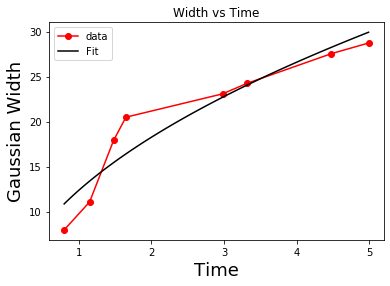

In [137]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize, signal                        # import a specific function from a package: 'optimize' for curve fitting

file_name = 'W_vs_t.csv'                           # replace with the name of your csv data file

file_folder = ''                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name
print(data_file)


xdata, ydata = np.loadtxt(                 
        data_file,                                # file to read
#       delimiter = '\t',                         # specify delimiting character 
        delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 3),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.                                                                                                   


def func(x,D,b):                                # Define your fitting function
    y = 4*((np.log(2)*D*x)**(1/2)) + b
    return y                   
 
# #Gaussian function
# def gauss_function(x, a, x0, sigma):
#     return a*np.exp(-(x-x0)**2/(2*sigma**2))

initialguess = [1,1]                     # initial guess for the parameters of the function func

fit, covariance = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        func,                                     # function to fit
        xdata,                                    # data for independant variable
        ydata,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameters
#         yerr)                                     # uncertainty in dependant variable

print("D:",fit[0],"+-",np.sqrt(covariance[0][0]))     #print value and one std error of the first fit parameter
print("b:",fit[1],"+-",np.sqrt(covariance[1][1]))     #print value and one std error of the second fit parameter
# print("sigma:",fit[2],"+-",np.sqrt(covariance[2][2]))
# print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=func(xdatafit,*fit)                     # create discrete data set from fitting function


##########
# Plotting data and fit
##########
  
plt.clf()                                         # clear plot figure
# plt.plot(xdata, ydata, '-om', label = 'fit')                     # plot the fit function 
plt.plot(xdata, ydata, '-or', label = 'data')                     # plot the fit function 
# plt.plot(xdata, ydata3, '-og', label = 'fit')                     # plot the fit function 
plt.plot(xdatafit, func_plot, '-k', label = 'Fit')                     # plot the fit function 
# plt.plot(x2, y2, '-r', label = 'non-leaky')
# plt.errorbar(xdata, ydata, fmt='k.')        # plot data with error bars, define format of plot (k=black)
plt.title('Width vs Time')             # plot title
plt.xlabel('Time',fontsize = 18)                     # label x axis
plt.ylabel('Gaussian Width',fontsize = 18)                     # label y axis
#plt.xlim(np.min(xdata),np.max(xdata))             # choose limits of x or y axis 
#plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis                                          
plt.savefig("./"+file_name+'_resulting_graph.png',dpi=300)         # save figure of plot
plt.legend() 
plt.show()                                        # show plot



Results1.3
a: 207.52436597302798 +- 2.1245345454207563
x0: 78.67493246237649 +- 0.04921861201092243
sigma: 4.163585261282664 +- 0.0492186116140183

a_2: 201.71698081823473 +- 2.7605874348072885
x0_2: 62.01091991154504 +- 0.0738445286827388
sigma_2: 4.672868535829655 +- 0.07384452945022894


<Figure size 432x288 with 0 Axes>

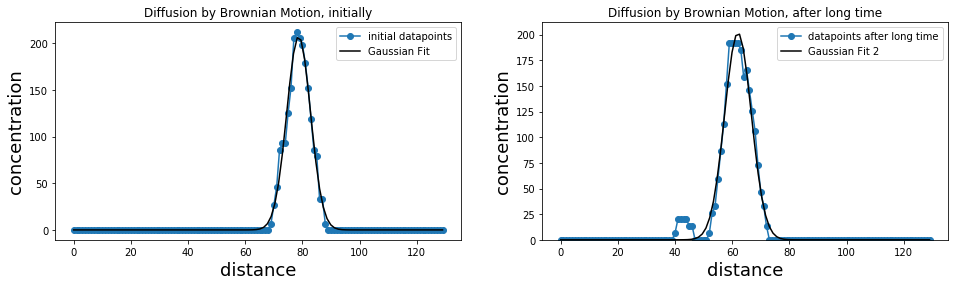

In [174]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize, signal                        # import a specific function from a package: 'optimize' for curve fitting

file_name = 'Results1.3'                           # replace with the name of your csv data file

file_folder = ''                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name
print(data_file)


xdata, ydata = np.loadtxt(                 
        data_file,                                # file to read
        delimiter = '\t',                         # specify delimiting character 
#       delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 19),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.                                                                                                   

xdata3, ydata3 = np.loadtxt(                 
        data_file,                                # file to read
        delimiter = '\t',                         # specify delimiting character 
#       delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 90),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.


# def func(x,a,b):                                # Define your fitting function
#     ans = a*np.exp(-0.5*((x-67)**2)/(b**2))
#     return ans                   
 
#Gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

initialguess = [1,60,10]                     # initial guess for the parameters of the function func

fit, covariance = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        gauss_function,                                     # function to fit
        xdata,                                    # data for independant variable
        ydata,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameters
#         yerr)                                     # uncertainty in dependant variable

print("a:",fit[0],"+-",np.sqrt(covariance[0][0]))     #print value and one std error of the first fit parameter
print("x0:",fit[1],"+-",np.sqrt(covariance[1][1]))     #print value and one std error of the second fit parameter
print("sigma:",fit[2],"+-",np.sqrt(covariance[2][2]))
# print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=gauss_function(xdatafit,*fit)                     # create discrete data set from fitting function

############ plot 2 ##################

fit2, covariance2 = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        gauss_function,                                     # function to fit
        xdata3,                                    # data for independant variable
        ydata3,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameters
#         yerr)                                     # uncertainty in dependant variable

print("\na_2:",fit2[0],"+-",np.sqrt(covariance2[0][0]))     #print value and one std error of the first fit parameter
print("x0_2:",fit2[1],"+-",np.sqrt(covariance2[1][1]))     #print value and one std error of the second fit parameter
print("sigma_2:",fit2[2],"+-",np.sqrt(covariance2[2][2]))
# print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

xdatafit2=np.linspace(min(xdata3), max(xdata3), 100) # make lots of xdata for a smooth curve
func_plot2=gauss_function(xdatafit2,*fit2)                     # create discrete data set from fitting function

##########
# Plotting data and fit
##########

plt.clf()                                         # clear plot figure

figure, (plot1, plot2) = plt.subplots(1,2, figsize = (16,4))    

plot1.plot(xdata, ydata, '-o', label = 'initial datapoints')                     # plot the fit function 
plot1.plot(xdatafit, func_plot, '-k', label = 'Gaussian Fit')                     # plot the fit function 
plot1.legend() 
plot1.set_title('Diffusion by Brownian Motion, initially')             # plot title
plot1.set_xlabel('distance',fontsize = 18)                     # label x axis
plot1.set_ylabel('concentration',fontsize = 18)                     # label y axis

plot2.plot(xdata3, ydata3, '-o', label = 'datapoints after long time')                     # plot the fit function 
plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis    
plot2.plot(xdatafit2, func_plot2, '-k', label = 'Gaussian Fit 2')                     # plot the fit function 
plot2.legend() 
plot2.set_title('Diffusion by Brownian Motion, after long time')             # plot title
plot2.set_xlabel('distance',fontsize = 18)                     # label x axis
plot2.set_ylabel('concentration',fontsize = 18)                     # label y axis
                               
plt.savefig("./"+file_name+'DataPlot_withFit2.pdf',dpi=300)         # save figure of plot

plt.show()                                        # show plot


W_vs_t2.csv
D: 10.280889230216903 +- 1.2478370400000498
b: -1.8708066377972037 +- 1.0316043756195303


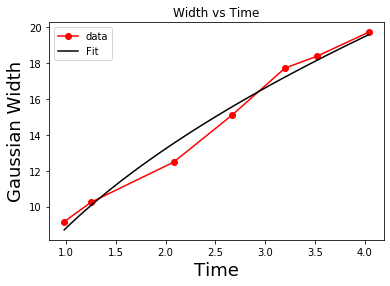

In [160]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize, signal                        # import a specific function from a package: 'optimize' for curve fitting

file_name = 'W_vs_t2.csv'                           # replace with the name of your csv data file

file_folder = ''                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name
print(data_file)


xdata, ydata = np.loadtxt(                 
        data_file,                                # file to read
#       delimiter = '\t',                         # specify delimiting character 
        delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 3),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.                                                                                                   


def func(x,D,b):                                # Define your fitting function
    y = 4*((np.log(2)*D*x)**(1/2)) + b
    return y                   
 
# #Gaussian function
# def gauss_function(x, a, x0, sigma):
#     return a*np.exp(-(x-x0)**2/(2*sigma**2))

initialguess = [1,1]                     # initial guess for the parameters of the function func

fit, covariance = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        func,                                     # function to fit
        xdata,                                    # data for independant variable
        ydata,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameters
#         yerr)                                     # uncertainty in dependant variable

print("D:",fit[0],"+-",np.sqrt(covariance[0][0]))     #print value and one std error of the first fit parameter
print("b:",fit[1],"+-",np.sqrt(covariance[1][1]))     #print value and one std error of the second fit parameter
# print("sigma:",fit[2],"+-",np.sqrt(covariance[2][2]))
# print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=func(xdatafit,*fit)                     # create discrete data set from fitting function


##########
# Plotting data and fit
##########
  
plt.clf()                                         # clear plot figure
# plt.plot(xdata, ydata, '-om', label = 'fit')                     # plot the fit function 
plt.plot(xdata, ydata, '-or', label = 'data')                     # plot the fit function 
# plt.plot(xdata, ydata3, '-og', label = 'fit')                     # plot the fit function 
plt.plot(xdatafit, func_plot, '-k', label = 'Fit')                     # plot the fit function 
# plt.plot(x2, y2, '-r', label = 'non-leaky')
# plt.errorbar(xdata, ydata, fmt='k.')        # plot data with error bars, define format of plot (k=black)
plt.title('Width vs Time')             # plot title
plt.xlabel('Time',fontsize = 18)                     # label x axis
plt.ylabel('Gaussian Width',fontsize = 18)                     # label y axis
#plt.xlim(np.min(xdata),np.max(xdata))             # choose limits of x or y axis 
#plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis                                          
plt.savefig("./"+file_name+'_resulting_graph2.png',dpi=300)         # save figure of plot
plt.legend() 
plt.show()                                        # show plot



W_vs_t3.csv
D: 10.835943267495862 +- 1.9201935989640282
b: -2.5049021437949315 +- 1.4815680564050173


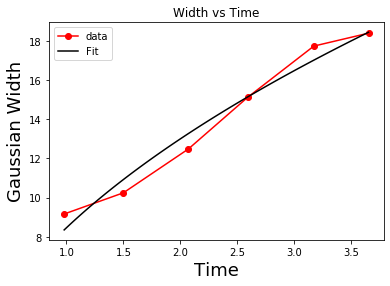

In [176]:
import numpy as np                                # import packages and give them quick handles since they will be used often
import matplotlib.pyplot as plt
from scipy import optimize, signal                        # import a specific function from a package: 'optimize' for curve fitting

file_name = 'W_vs_t3.csv'                           # replace with the name of your csv data file

file_folder = ''                                  # use this if your data file is in the same folder as your python program

data_file = file_folder + file_name
print(data_file)


xdata, ydata = np.loadtxt(                 
        data_file,                                # file to read
#       delimiter = '\t',                         # specify delimiting character 
        delimiter = ',',                           # specify delimiting character 
        skiprows = 1,                             # rows to skip for header
        usecols = (1, 3),                      # which columns to use
        unpack = True)                            # indicates that our data sets are in columns, not rows.                                                                                                   


def func(x,D,b):                                # Define your fitting function
    y = 4*((np.log(2)*D*x)**(1/2)) + b
    return y                   
 
# #Gaussian function
# def gauss_function(x, a, x0, sigma):
#     return a*np.exp(-(x-x0)**2/(2*sigma**2))

initialguess = [1,1]                     # initial guess for the parameters of the function func

fit, covariance = optimize.curve_fit(             # call to the fitting routine curve_fit.  Returns optimal values of the fit parameters, and their estimated variance
        func,                                     # function to fit
        xdata,                                    # data for independant variable
        ydata,                                    # data for dependant variable
        initialguess)                             # initial guess of fit parameters
#         yerr)                                     # uncertainty in dependant variable

print("D:",fit[0],"+-",np.sqrt(covariance[0][0]))     #print value and one std error of the first fit parameter
print("b:",fit[1],"+-",np.sqrt(covariance[1][1]))     #print value and one std error of the second fit parameter
# print("sigma:",fit[2],"+-",np.sqrt(covariance[2][2]))
# print("Be sure to use the correct number of significant digits in your final answer!!!!!!!!!!!!1!")

xdatafit=np.linspace(min(xdata), max(xdata), 100) # make lots of xdata for a smooth curve
func_plot=func(xdatafit,*fit)                     # create discrete data set from fitting function


##########
# Plotting data and fit
##########
  
plt.clf()                                         # clear plot figure
# plt.plot(xdata, ydata, '-om', label = 'fit')                     # plot the fit function 
plt.plot(xdata, ydata, '-or', label = 'data')                     # plot the fit function 
# plt.plot(xdata, ydata3, '-og', label = 'fit')                     # plot the fit function 
plt.plot(xdatafit, func_plot, '-k', label = 'Fit')                     # plot the fit function 
# plt.plot(x2, y2, '-r', label = 'non-leaky')
# plt.errorbar(xdata, ydata, fmt='k.')        # plot data with error bars, define format of plot (k=black)
plt.title('Width vs Time')             # plot title
plt.xlabel('Time',fontsize = 18)                     # label x axis
plt.ylabel('Gaussian Width',fontsize = 18)                     # label y axis
#plt.xlim(np.min(xdata),np.max(xdata))             # choose limits of x or y axis 
#plt.ylim(np.min(ydata),np.max(ydata))             # choose limits of x or y axis                                          
plt.savefig("./"+file_name+'_resulting_graph3.png',dpi=300)         # save figure of plot
plt.legend() 
plt.show()                                        # show plot

